In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [30]:
dataset=pd.read_csv("Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


/home/yusuf/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


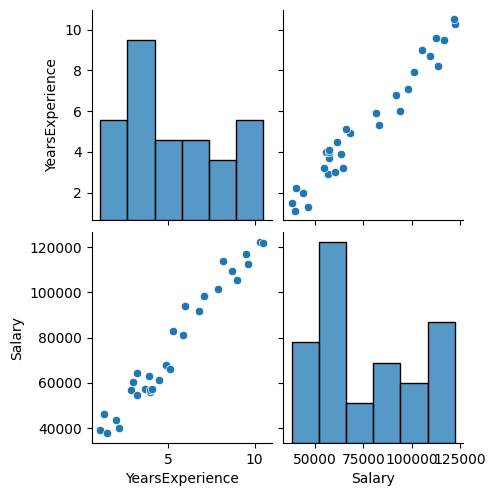

In [31]:
sns.pairplot(dataset)

In [32]:
#X ve y'lerin belirlenmesi
X = dataset.drop(['Salary'], axis = True)
X=X.values
y = dataset['Salary'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [35]:
print(X_train.shape)
print(X_train.squeeze().shape)

(24, 1)
(24,)


In [36]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [37]:
y_pred = regressor.predict(X_test).round(1)

In [38]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ["Original Salary", "Predicted Salary"])
hesaplama

,Original Salary,Predicted Salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


In [39]:
#Modelimizin kesişimi (intercept)
regressor.intercept_

25321.583011776813

In [40]:
#Years Experience'ın katsayısı
regressor.coef_

array([9423.81532303])

In [41]:
print("Salary= " + str("%.2f" % regressor.intercept_) + "+YearsExperience*" + str("%.2f" % regressor.coef_[0]))

Salary= 25321.58+YearsExperience*9423.82


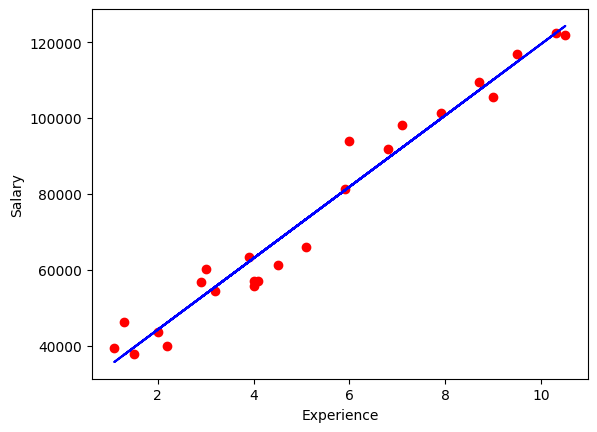

In [42]:
%matplotlib inline

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train.squeeze(), regressor.predict(X_train), color = 'b')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

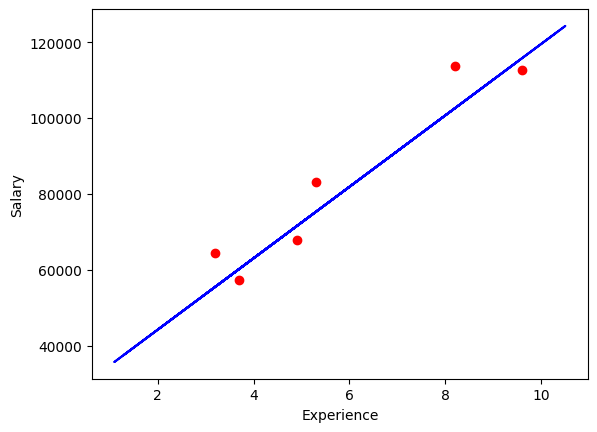

In [43]:
%matplotlib inline

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train.squeeze(),regressor.predict(X_train), color = 'b') #Squeeze : (24,1) ----> (24,)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

Artıkların toplamının ortalamaların toplamına olan oranı ne kadar küçük ise R2 o kadar yüksek olacaktır.


Artıkların Kareler Toplamı (AKT) sıfır olacağından R2‘e de 1’e eşit olacak ve alabileceği en yüksek değeri alacaktır.

In [47]:
#R2 score'unu ölçme
print(f'R^2 skorumuz : {r2_score(y_test, y_pred)}')

R^2 skorumuz : 0.9024464011295138


In [45]:
#Modeli ölçme
rmse = mean_squared_error(y_pred, y_test)

rmse

49829982.58500001

In [46]:
#Done!